## Importing Libraries

In [1]:
import pandas as pd 
import numpy as np
import os
import matplotlib.pyplot as plt
from dateutil.relativedelta import relativedelta
import datetime
from datetime import date

## Importing data

In [2]:
os.getcwd()

'/Users/prabhatvashishth/Desktop/Projects/Arya'

In [3]:
#train data
df_ben = pd.read_csv('Medicare-Fraud-Detection-DS/Train_Beneficiarydata-1542865627584.csv')
df_out = pd.read_csv('Medicare-Fraud-Detection-DS/Train_Outpatientdata-1542865627584.csv')
df_in = pd.read_csv('Medicare-Fraud-Detection-DS/Train_Inpatientdata-1542865627584.csv')
df_n = pd.read_csv('Medicare-Fraud-Detection-DS/Train-1542865627584.csv')

#test data
df_ben_test = pd.read_csv('Medicare-Fraud-Detection-DS/Test_Beneficiarydata-1542969243754.csv')
df_out_test = pd.read_csv('Medicare-Fraud-Detection-DS/Test_Outpatientdata-1542969243754.csv')
df_in_test = pd.read_csv('Medicare-Fraud-Detection-DS/Test_Inpatientdata-1542969243754.csv')
df_test = pd.read_csv('Medicare-Fraud-Detection-DS/Test-1542969243754.csv')

## Beneficiary Data EDA

In [4]:
print(df_ben.shape, df_ben_test.shape)
df_ben.head(2)

(138556, 25) (63968, 25)


,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,...,2,2,2,2,2,2,0,0,30,50


In [5]:
df_ben.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138556 entries, 0 to 138555
Data columns (total 25 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   BeneID                           138556 non-null  object
 1   DOB                              138556 non-null  object
 2   DOD                              1421 non-null    object
 3   Gender                           138556 non-null  int64 
 4   Race                             138556 non-null  int64 
 5   RenalDiseaseIndicator            138556 non-null  object
 6   State                            138556 non-null  int64 
 7   County                           138556 non-null  int64 
 8   NoOfMonths_PartACov              138556 non-null  int64 
 9   NoOfMonths_PartBCov              138556 non-null  int64 
 10  ChronicCond_Alzheimer            138556 non-null  int64 
 11  ChronicCond_Heartfailure         138556 non-null  int64 
 12  ChronicCond_Kidn

<Axes: ylabel='Frequency'>

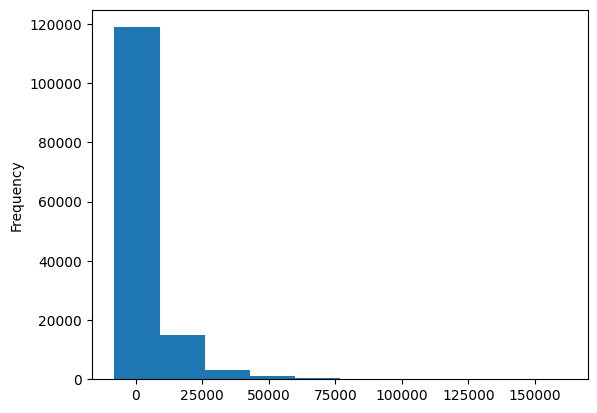

In [6]:
df_ben['IPAnnualReimbursementAmt'].plot(kind = 'hist')

<Axes: ylabel='Frequency'>

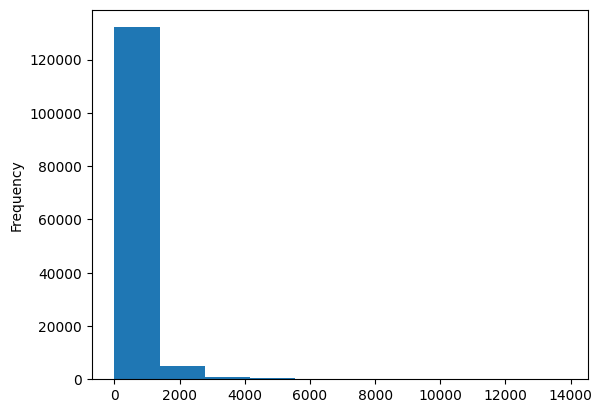

In [7]:
df_ben['OPAnnualDeductibleAmt'].plot(kind = 'hist')

## In-paitient & Out-paitient Data EDA

In [8]:
print(df_in.shape, df_in_test.shape)
df_in.head(2)

(40474, 30) (9551, 30)


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN


In [9]:
df_in.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40474 entries, 0 to 40473
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   BeneID                  40474 non-null  object 
 1   ClaimID                 40474 non-null  object 
 2   ClaimStartDt            40474 non-null  object 
 3   ClaimEndDt              40474 non-null  object 
 4   Provider                40474 non-null  object 
 5   InscClaimAmtReimbursed  40474 non-null  int64  
 6   AttendingPhysician      40362 non-null  object 
 7   OperatingPhysician      23830 non-null  object 
 8   OtherPhysician          4690 non-null   object 
 9   AdmissionDt             40474 non-null  object 
 10  ClmAdmitDiagnosisCode   40474 non-null  object 
 11  DeductibleAmtPaid       39575 non-null  float64
 12  DischargeDt             40474 non-null  object 
 13  DiagnosisGroupCode      40474 non-null  object 
 14  ClmDiagnosisCode_1      40474 non-null

In [10]:
df_in['Provider'].nunique()

2092

In [11]:
print(df_out.shape, df_out_test.shape)
df_out.head(2)

(517737, 27) (125841, 27)


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380


In [12]:
df_out.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517737 entries, 0 to 517736
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   BeneID                  517737 non-null  object 
 1   ClaimID                 517737 non-null  object 
 2   ClaimStartDt            517737 non-null  object 
 3   ClaimEndDt              517737 non-null  object 
 4   Provider                517737 non-null  object 
 5   InscClaimAmtReimbursed  517737 non-null  int64  
 6   AttendingPhysician      516341 non-null  object 
 7   OperatingPhysician      90617 non-null   object 
 8   OtherPhysician          195046 non-null  object 
 9   ClmDiagnosisCode_1      507284 non-null  object 
 10  ClmDiagnosisCode_2      322357 non-null  object 
 11  ClmDiagnosisCode_3      203257 non-null  object 
 12  ClmDiagnosisCode_4      125596 non-null  object 
 13  ClmDiagnosisCode_5      74344 non-null   object 
 14  ClmDiagnosisCode_6  

In [13]:
df_out['Provider'].nunique()

5012

In [14]:
#flag for in-paitient and out-paitient 
df_in['Admitted'] = 1
df_out['Admitted'] = 0

df_in_test['Admitted'] = 1
df_out_test['Admitted'] = 0

In [15]:
common_cols = [col for col in df_out.columns if col in df_in.columns]
common_cols_test = [col for col in df_out_test.columns if col in df_in_test.columns]
print(len(common_cols), len(common_cols_test))

28 28


In [16]:
df1 = df_in.merge(df_out, on = common_cols, how = 'outer')
df1_test = df_in_test.merge(df_out_test, on = common_cols, how = 'outer')
df1.shape, df1_test.shape

((558211, 31), (135392, 31))

## Target Labels EDA

In [17]:
print(df_n.shape, df_test.shape)
df_n.head(2)

(5410, 2) (1353, 1)


,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes


In [18]:
df_n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5410 entries, 0 to 5409
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Provider        5410 non-null   object
 1   PotentialFraud  5410 non-null   object
dtypes: object(2)
memory usage: 84.7+ KB


In [19]:
df_n['PotentialFraud'].value_counts()

PotentialFraud
No     4904
Yes     506
Name: count, dtype: int64

In [20]:
df_n['PotentialFraud'].value_counts(normalize=True)

PotentialFraud
No     0.90647
Yes    0.09353
Name: proportion, dtype: float64

In [21]:
df2 = df1.merge(df_ben , on ='BeneID', how='inner')
df2_test = df1_test.merge(df_ben_test , on ='BeneID', how='inner')
df2.shape, df2_test.shape

((558211, 55), (135392, 55))

In [22]:
df = df2.merge(df_n, on='Provider', how = 'inner')
df_test = df2_test.merge(df_test, on='Provider', how='inner')
df.shape, df_test.shape

((558211, 56), (135392, 55))

In [23]:
df['PotentialFraud'].value_counts(normalize=True)

PotentialFraud
No     0.618789
Yes    0.381211
Name: proportion, dtype: float64

## Feature Engineering

In [24]:
date_cols = ['ClaimStartDt' , 'ClaimEndDt','DOB','DOD','AdmissionDt','DischargeDt']
for col in date_cols:
    df[col] = pd.to_datetime(df[col])
df['Claims_days'] = (df['ClaimEndDt'] - df['ClaimStartDt']).dt.days
df['Age'] = df['DOD'].dt.year - df['DOB'].dt.year
df['Age'].fillna(value = 2024 - df['DOB'].dt.year,inplace=True)
df['Alive'] = np.where(df['DOD'].isnull(),1,0)
df['Admit_days'] =  (df['DischargeDt']- df['AdmissionDt']).dt.days
df.drop(columns = date_cols,inplace=True)

date_cols = ['ClaimStartDt' , 'ClaimEndDt','DOB','DOD','AdmissionDt','DischargeDt']
for col in date_cols:
    df_test[col] = pd.to_datetime(df_test[col])
df_test['Claims_days'] = (df_test['ClaimEndDt'] - df_test['ClaimStartDt']).dt.days
df_test['Age'] = df_test['DOD'].dt.year - df_test['DOB'].dt.year
df_test['Age'].fillna(value = 2024 - df_test['DOB'].dt.year,inplace=True)
df_test['Alive'] = np.where(df_test['DOD'].isnull(),1,0)
df_test['Admit_days'] =  (df_test['DischargeDt']- df_test['AdmissionDt']).dt.days
df_test.drop(columns = date_cols,inplace=True)

df.shape, df_test.shape

/var/folders/mq/r9v206b12gd772y3zfyym6pr0000gn/T/ipykernel_15568/38662415.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(value = 2024 - df['DOB'].dt.year,inplace=True)
/var/folders/mq/r9v206b12gd772y3zfyym6pr0000gn/T/ipykernel_15568/38662415.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting

((558211, 54), (135392, 53))

In [25]:
df["ClmCount_Provider"]=df.groupby(['Provider'])['ClaimID'].transform('count')
df["ClmCount_Provider_BeneID"]=df.groupby(['Provider','BeneID'])['ClaimID'].transform('count')
df["ClmCount_Provider_AttendingPhysician"]=df.groupby(['Provider','AttendingPhysician'])['ClaimID'].transform('count')
df["ClmCount_Provider_OtherPhysician"]=df.groupby(['Provider','OtherPhysician'])['ClaimID'].transform('count')
df["ClmCount_Provider_OperatingPhysician"]=df.groupby(['Provider','OperatingPhysician'])['ClaimID'].transform('count')
df["ClmCount_Provider_ClmAdmitDiagnosisCode"]=df.groupby(['Provider','ClmAdmitDiagnosisCode'])['ClaimID'].transform('count')

df_test["ClmCount_Provider"]=df_test.groupby(['Provider'])['ClaimID'].transform('count')
df_test["ClmCount_Provider_BeneID"]=df_test.groupby(['Provider','BeneID'])['ClaimID'].transform('count')
df_test["ClmCount_Provider_AttendingPhysician"]=df_test.groupby(['Provider','AttendingPhysician'])['ClaimID'].transform('count')
df_test["ClmCount_Provider_OtherPhysician"]=df_test.groupby(['Provider','OtherPhysician'])['ClaimID'].transform('count')
df_test["ClmCount_Provider_OperatingPhysician"]=df_test.groupby(['Provider','OperatingPhysician'])['ClaimID'].transform('count')
df_test["ClmCount_Provider_ClmAdmitDiagnosisCode"]=df_test.groupby(['Provider','ClmAdmitDiagnosisCode'])['ClaimID'].transform('count')

df.shape, df_test.shape

((558211, 60), (135392, 59))

In [26]:
df["ClmCount_Provider_BeneID_AttendingPhysician"]=df.groupby(['Provider','BeneID','AttendingPhysician'])['ClaimID'].transform('count')
df["ClmCount_Provider_BeneID_OtherPhysician"]=df.groupby(['Provider','BeneID','OtherPhysician'])['ClaimID'].transform('count')
df["ClmCount_Provider_BeneID_OperatingPhysician"]=df.groupby(['Provider','BeneID','OperatingPhysician'])['ClaimID'].transform('count')

df_test["ClmCount_Provider_BeneID_AttendingPhysician"]=df_test.groupby(['Provider','BeneID','AttendingPhysician'])['ClaimID'].transform('count')
df_test["ClmCount_Provider_BeneID_OtherPhysician"]=df_test.groupby(['Provider','BeneID','OtherPhysician'])['ClaimID'].transform('count')
df_test["ClmCount_Provider_BeneID_OperatingPhysician"]=df_test.groupby(['Provider','BeneID','OperatingPhysician'])['ClaimID'].transform('count')

df.shape, df_test.shape

((558211, 63), (135392, 62))

In [27]:
df.columns

Index(['BeneID', 'ClaimID', 'Provider', 'InscClaimAmtReimbursed',
       'AttendingPhysician', 'OperatingPhysician', 'OtherPhysician',
       'ClmAdmitDiagnosisCode', 'DeductibleAmtPaid', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6', 'Admitted', 'Gender', 'Race',
       'RenalDiseaseIndicator', 'State', 'County', 'NoOfMonths_PartACov',
       'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depression', 'ChronicCond_Diabetes',
       'ChronicCond_IschemicHeart', 'ChronicCond_Osteopo

In [28]:
df = pd.get_dummies(df,columns=['Gender', 'Race'], drop_first=True)
df['PotentialFraud'] = df['PotentialFraud'].replace({'Yes':1,'No':0})
df['RenalDiseaseIndicator'] = df['RenalDiseaseIndicator'].replace({'Y':1,'0':0})

df_test = pd.get_dummies(df_test,columns=['Gender', 'Race'], drop_first=True)
df_test['RenalDiseaseIndicator'] = df_test['RenalDiseaseIndicator'].replace({'Y':1,'0':0})

df.shape, df_test.shape

/var/folders/mq/r9v206b12gd772y3zfyym6pr0000gn/T/ipykernel_15568/1393028138.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['PotentialFraud'] = df['PotentialFraud'].replace({'Yes':1,'No':0})
/var/folders/mq/r9v206b12gd772y3zfyym6pr0000gn/T/ipykernel_15568/1393028138.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['RenalDiseaseIndicator'] = df['RenalDiseaseIndicator'].replace({'Y':1,'0':0})
/var/folders/mq/r9v206b12gd772y3zfyym6pr0000gn/T/ipykernel_15568/1393028138.py:6: FutureWarning: Downcasting behavior in `replace

((558211, 65), (135392, 64))

In [29]:
df.drop(columns = ['BeneID', 'ClaimID','AttendingPhysician', 'OperatingPhysician', 'OtherPhysician',
       'ClmAdmitDiagnosisCode','DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6','State', 'County'],inplace=True)

df_test.drop(columns = ['BeneID', 'ClaimID','AttendingPhysician', 'OperatingPhysician', 'OtherPhysician',
       'ClmAdmitDiagnosisCode','DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6','State', 'County'],inplace=True)

df.shape, df_test.shape

((558211, 40), (135392, 39))

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558211 entries, 0 to 558210
Data columns (total 40 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Provider                                     558211 non-null  object 
 1   InscClaimAmtReimbursed                       558211 non-null  int64  
 2   DeductibleAmtPaid                            557312 non-null  float64
 3   Admitted                                     558211 non-null  int64  
 4   RenalDiseaseIndicator                        558211 non-null  int64  
 5   NoOfMonths_PartACov                          558211 non-null  int64  
 6   NoOfMonths_PartBCov                          558211 non-null  int64  
 7   ChronicCond_Alzheimer                        558211 non-null  int64  
 8   ChronicCond_Heartfailure                     558211 non-null  int64  
 9   ChronicCond_KidneyDisease                    558211 non-nul

In [31]:
df.fillna(value=0, inplace=True)
df_test.fillna(value=0, inplace=True)

In [32]:
df.isnull().sum().sum(), df_test.isnull().sum().sum()

(0, 0)

In [33]:
df_train = df.groupby(['Provider','PotentialFraud'],as_index=False).agg('sum')
df_test_score = df_test.groupby(['Provider'],as_index=False).agg('sum')

In [34]:
df_train.shape, df_test_score.shape

((5410, 40), (1353, 39))

In [35]:
df_train.head()

,Provider,PotentialFraud,InscClaimAmtReimbursed,DeductibleAmtPaid,Admitted,RenalDiseaseIndicator,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,...,ClmCount_Provider_OtherPhysician,ClmCount_Provider_OperatingPhysician,ClmCount_Provider_ClmAdmitDiagnosisCode,ClmCount_Provider_BeneID_AttendingPhysician,ClmCount_Provider_BeneID_OtherPhysician,ClmCount_Provider_BeneID_OperatingPhysician,Gender_2,Race_2,Race_3,Race_5
0,PRV51001,0,104640,5340.0,5,8,300,300,35,31,...,14.0,5.0,11.0,25.0,10.0,5.0,16,4,0,0
1,PRV51003,1,605670,66286.0,62,29,1560,1567,208,184,...,31.0,807.0,144.0,138.0,25.0,45.0,78,24,0,1
2,PRV51004,0,52170,310.0,0,23,1768,1782,234,210,...,309.0,51.0,34.0,149.0,63.0,27.0,103,24,5,0
3,PRV51005,1,280910,3700.0,0,259,13872,13910,1904,1650,...,62710.0,9186.0,910.0,2071.0,660.0,264.0,654,262,10,0
4,PRV51007,0,33710,3264.0,3,11,852,852,118,104,...,192.0,48.0,17.0,82.0,28.0,12.0,38,14,0,0


## Modeling

In [36]:
from sklearn.model_selection import train_test_split
X = df_train.drop(columns = ['PotentialFraud','Provider'])
y = df_train['PotentialFraud']
print(X.shape,y.shape)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=42, stratify = y) 
X_train.shape, X_val.shape, y_train.shape, y_val.shape

(5410, 38) (5410,)


((4328, 38), (1082, 38), (4328,), (1082,))

In [37]:
y_train.value_counts()

PotentialFraud
0    3923
1     405
Name: count, dtype: int64

In [38]:
y_val.value_counts()

PotentialFraud
0    981
1    101
Name: count, dtype: int64

In [39]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42, class_weight='balanced',n_jobs=-1)
rf.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=42)

In [40]:
from sklearn.metrics import roc_auc_score, classification_report, average_precision_score
y_pred = rf.predict(X_val)
print(classification_report(y_val, y_pred))
y_pred_val = rf.predict_proba(X_val)[:,1]
y_pred_tr = rf.predict_proba(X_train)[:,1]
print('val_roc:',roc_auc_score(y_val,y_pred_val))
print('train_roc:',roc_auc_score(y_train,y_pred_tr))
print('val_prc:',average_precision_score(y_val,y_pred_val))
print('train_prc:',average_precision_score(y_train,y_pred_tr))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       981
           1       0.75      0.54      0.63       101

    accuracy                           0.94      1082
   macro avg       0.85      0.76      0.80      1082
weighted avg       0.94      0.94      0.94      1082

val_roc: 0.9589426832591517
train_roc: 1.0
val_prc: 0.7608312364399106
train_prc: 1.0


In [41]:
from sklearn.model_selection import RandomizedSearchCV
param_dist = {'n_estimators': [50, 100, 200],
    'max_depth': [5,10,15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]}

rf = RandomForestClassifier(random_state=42,n_jobs=-1)
random_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=10, 
                                   scoring='roc_auc',n_jobs=-1, cv=5, random_state=42,return_train_score=True)
random_search.fit(X, y)

pd.DataFrame({'val_AUROC':random_search.cv_results_['mean_test_score'],
              'train_AUROC':random_search.cv_results_['mean_train_score']})

,val_AUROC,train_AUROC
0,0.937290,0.997052
1,0.939374,0.960108
2,0.938774,0.958623
3,0.939181,0.997697
4,0.938909,0.958706
5,0.937862,0.999032
6,0.938877,0.959885
7,0.937922,0.997514
8,0.938711,0.960408
9,0.939132,0.959562


In [42]:
random_search.cv_results_['params'][7]

{'n_estimators': 100,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_depth': 15}

In [43]:
rf_opt = RandomForestClassifier(**random_search.cv_results_['params'][5])
rf_opt.fit(X_train,y_train)
print(classification_report(y_val, y_pred))
y_pred_val = rf_opt.predict_proba(X_val)[:,1]
y_pred_tr = rf_opt.predict_proba(X_train)[:,1]
print('val_roc:',roc_auc_score(y_val,y_pred_val))
print('train_roc:',roc_auc_score(y_train,y_pred_tr))
print('val_prc:',average_precision_score(y_val,y_pred_val))
print('train_prc:',average_precision_score(y_train,y_pred_tr))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       981
           1       0.75      0.54      0.63       101

    accuracy                           0.94      1082
   macro avg       0.85      0.76      0.80      1082
weighted avg       0.94      0.94      0.94      1082

val_roc: 0.9608703989665023
train_roc: 0.9991584923354827
val_prc: 0.7644184297559753
train_prc: 0.9927263715461165


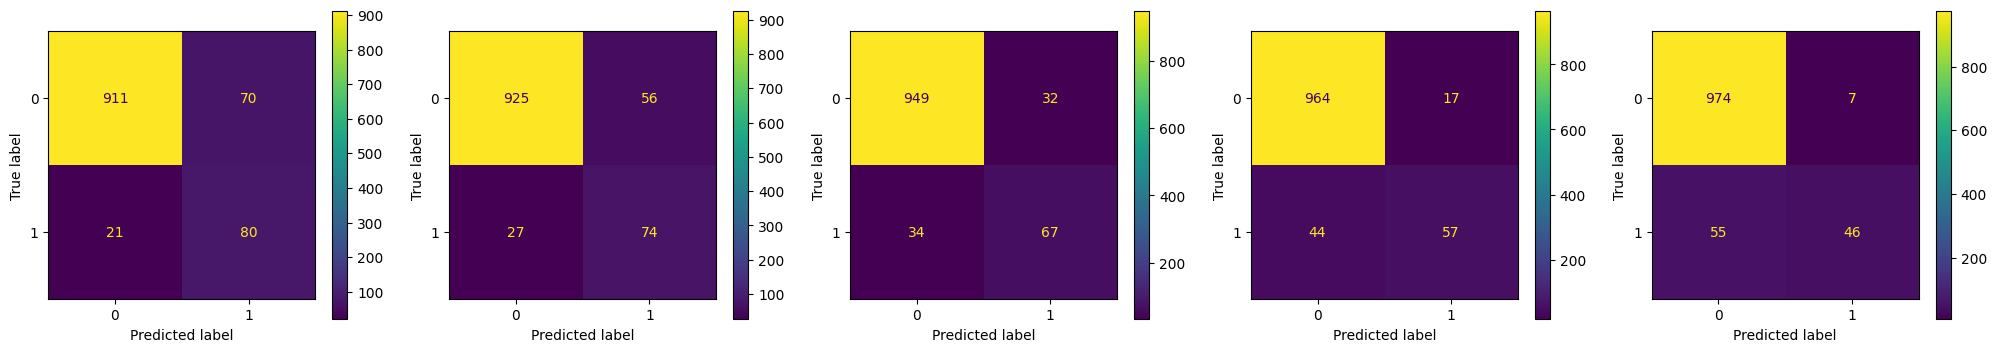

In [44]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
threshold = [0.25,0.3,0.4,0.5,0.65]
fig, axes = plt.subplots(nrows=1, ncols=len(threshold), figsize=(25, 4), squeeze=True)
for i in range(len(threshold)):
    y_pred_th = (y_pred_val>threshold[i]).astype('float')
    conf_mat = confusion_matrix(y_val, y_pred_th)
    ConfusionMatrixDisplay(conf_mat).plot(ax = axes[i])

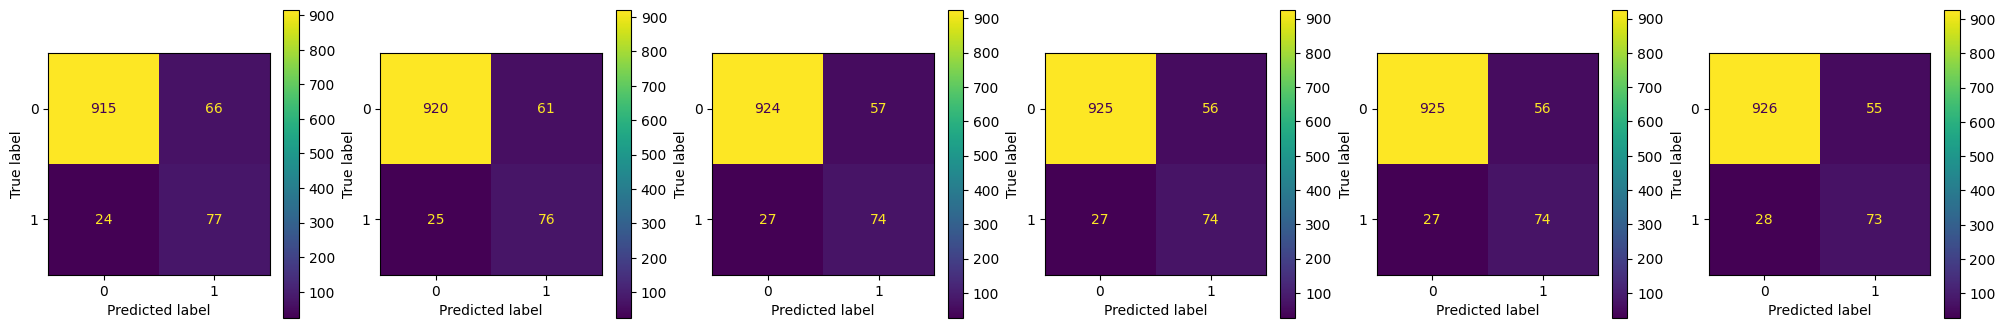

In [45]:
threshold = [0.27,0.28,0.29,0.3,0.31,0.32]
fig, axes = plt.subplots(nrows=1, ncols=len(threshold), figsize=(25, 4), squeeze=True)
for i in range(len(threshold)):
    y_pred_th = (y_pred_val>threshold[i]).astype('float')
    conf_mat = confusion_matrix(y_val, y_pred_th)
    ConfusionMatrixDisplay(conf_mat).plot(ax = axes[i])

## Scoring Test Data

In [46]:
X_test = df_test_score.drop(columns = 'Provider')
y_pred = rf_opt.predict_proba(X_test)[:,1]
df_test_score['y_pred'] = (y_pred>0.3).astype('float')
df_test_score[['Provider','y_pred']].to_csv('test_score.csv',index=False)